In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

mnist = tf.keras.datasets.mnist

---
# **Visualization**
---

In [2]:
def visualize(x_test, y_test):
    plt.imshow(x_test[0], cmap=plt.cm.binary)
    print(y_test[0])
    plt.show()

---
# **Dataset**
---

Data type:  uint8
Samples:  (60000, 28, 28)
Dim:  3
7


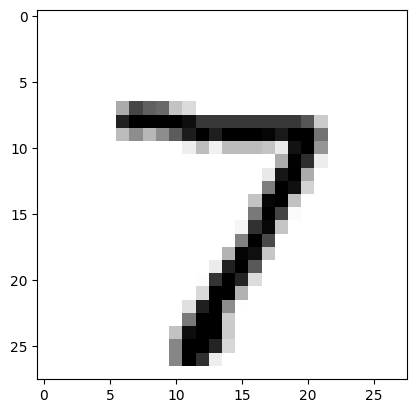

In [3]:
def dataset():
    (x_train, y_train), (
        x_test,
        y_test,
    ) = mnist.load_data()

    # Explore the dataset
    # Array of 60,000 images of uint8
    print("Data type: ", x_train.dtype)
    print("Samples: ", x_train.shape)
    print("Dim: ", x_train.ndim)

    visualize(x_test, y_test)

    # Flatten the dataset
    x_train = x_train.reshape((60000, 28 * 28))
    x_test = x_test.reshape((10000, 28 * 28))

    # Scale the dataset
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    return (x_train, y_train), (
        x_test,
        y_test,
    )


(x_train, y_train), (
    x_test,
    y_test,
) = dataset()

debug_point = 0

---
# **Training**
---

In [4]:
def train():
    # Configure the model for forward propagation
    model = keras.Sequential(
        [
            keras.layers.Dense(units=128, activation=tf.nn.relu),
            keras.layers.Dense(units=128, activation=tf.nn.relu),
            keras.layers.Dense(units=10, activation=tf.nn.softmax),
        ]
    )
    # Configure the model for backward propagation
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.legacy.RMSprop(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    # Train the model
    history = model.fit(x_train, y_train, epochs=20, verbose=False)
    print(history.history.keys())
    return model, history


model, history = train()

dict_keys(['loss', 'sparse_categorical_accuracy'])


---
# **Exploration**
---

dict_keys(['loss', 'sparse_categorical_accuracy'])


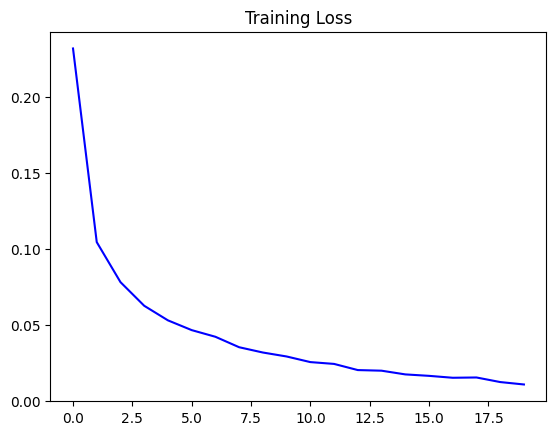

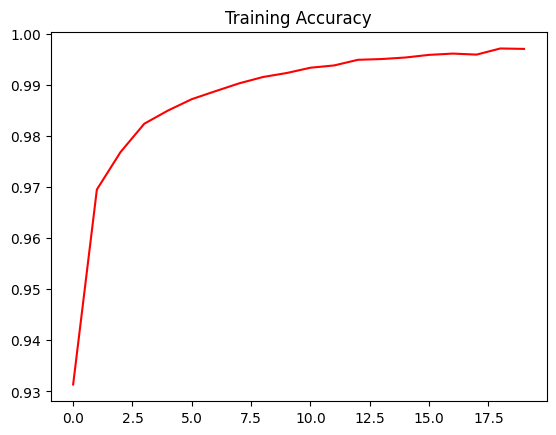

In [5]:
print(history.history.keys())
plt.title("Training Loss")
plt.plot(history.history["loss"], "b")
plt.show()
plt.title("Training Accuracy")
plt.plot(history.history["sparse_categorical_accuracy"], "r")
plt.show()

---
# **Evaluate**
---

In [6]:
def evaluate():
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=False)
    print("Test Loss: ", test_loss)
    print("Test Acc: ", test_acc)


evaluate()

Test Loss:  0.2133718729019165
Test Acc:  0.9785000085830688


---
# **Prediction**
---

In [7]:
def predict():
    x_ground = x_test[:5]
    y_predict = model.predict(x_ground, verbose=False)
    for index in range(len(x_ground)):
        print()
        print("Ground: ", y_test[index])
        print("Prediction: ", (y_predict[index].argmax()))
        print("Confidence: ", (y_predict[index].max()))


predict()


Ground:  7
Prediction:  7
Confidence:  1.0

Ground:  2
Prediction:  2
Confidence:  1.0

Ground:  1
Prediction:  1
Confidence:  1.0

Ground:  0
Prediction:  0
Confidence:  1.0

Ground:  4
Prediction:  4
Confidence:  1.0
